'C:\\Users\\DELL\\Desktop'

In [58]:
cd Desktop


[WinError 2] The system cannot find the file specified: 'Desktop'
C:\Users\DELL\Desktop


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.impute import KNNImputer

%matplotlib inline 
 
print ("imported")

imported


In [60]:
data=pd.read_csv("titanic.csv")
data.head(20)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [61]:
x=float('nan')
math.isnan(x)

True

We have nan values here

In [62]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


We have objects here. therefore not everything is numeric.

In [64]:
#data.Sex.replace(to_replace=['female','male'],value=[1,0])
data.Sex = data.Sex.map({'male':0, 'female':1}) 

One of the best ways to check out potential relationships or correlations amongst the different data attributes is to leverage a pair-wise correlation matrix and depict it as a heatmap.

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    int64  
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.6+ KB


In [66]:
df=data[["Survived","Pclass","Age","Sex","Fare","Parents/Children Aboard","Siblings/Spouses Aboard"]]
df.head()

,Survived,Pclass,Age,Sex,Fare,Parents/Children Aboard,Siblings/Spouses Aboard
0,0,3,22.0,0,7.2500,0,1
1,1,1,38.0,1,71.2833,0,1
2,1,3,26.0,1,7.9250,0,0
3,1,1,35.0,1,53.1000,0,1
4,0,3,35.0,0,8.0500,0,0


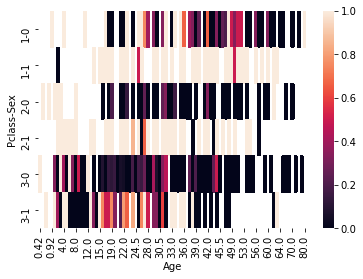

In [67]:
hmdata=pd.pivot_table(df,values="Survived",index=["Pclass","Sex"],columns="Age")
sns.heatmap(hmdata)

### Observations here
1. Females have a much better chance of survival. 
2. The chances of survival decrease with the class of boarding
3. infants have a good chance of survival
4. In class 1 and 2 children have a great chance of survival
5. Chances of survival decrease with growing age



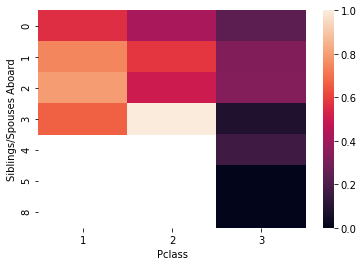

In [68]:
hmdata=pd.pivot_table(df,values="Survived",index=["Siblings/Spouses Aboard"],columns="Pclass")
sns.heatmap(hmdata)

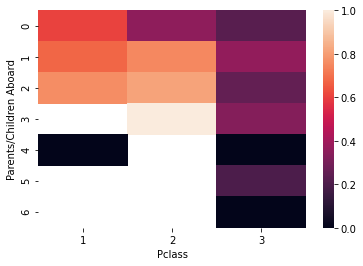

In [69]:
hmdata=pd.pivot_table(df,values="Survived",index=["Parents/Children Aboard"],columns="Pclass")
sns.heatmap(hmdata)

SO considering everything . I am going to use the following features
1. Sex
2. Pclass
3. Age

In [70]:
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [81]:
x = data.drop(['Survived','Name','Siblings/Spouses Aboard','Parents/Children Aboard'],axis = 1)
y = df.Survived
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

In [82]:
logistic_regression = LogisticRegression()

In [83]:
logistic_regression.fit(x_train,y_train)
y_pred = logistic_regression.predict(x_test)

In [84]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

80.63063063063063